In [1]:
%matplotlib inline
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy

# Logistic Regression

## Load & Process dataset

###### load shape : (m , n)

In [2]:
path = "dataset/ex2data1.txt"
ori_data_01 = np.loadtxt(path, delimiter=',')

print(">> ori_data_01.shape :", ori_data_01.shape)
print("\n>> ori_data_01[:3]\n", ori_data_01[:3])

>> ori_data_01.shape : (100, 3)

>> ori_data_01[:3]
 [[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]]


###### get ori Matrix-X, Vector-y
> + X_ori : (m, n)
> + y_ori : (m, )

In [3]:
def get_ori_X_y(ori, method=0):
    m = ori.shape[0]
    
    if method == 0:     # Python Slice by [-1]
        X_ori = np.array(ori[:,:-1])
        y_ori = np.array(ori[:, -1:]).reshape((-1,))
    elif method == 1:   # Pythone Slice by [size]
        size = ori.shape[1]
        X_ori = np.array(ori[:,:size-1])
        y_ori = np.array(ori[:,size-1:]).reshape((-1,))
    
    print(">> X_ori.shape :", X_ori.shape)
    print("   y_ori.shape :", y_ori.shape)
    print("   Samples :", m)
    
    return X_ori, y_ori, m

X_ori, y_ori, m = get_ori_X_y(ori_data_01)

>> X_ori.shape : (100, 2)
   y_ori.shape : (100,)
   Samples : 100


###### Feature Normalization

In [4]:
mu_train = 0
std_train = 0

def feature_normalization(X):
    global mu_train, std_train
    
    mu_train = np.mean(X, axis=0)
    std_train = np.std(X, axis=0)
    
    X_norm = (X - mu_train) / std_train
    
    return X_norm
    
X_norm = feature_normalization(X_ori)
print(">> X_norm[:3]\n", X_norm[:3])

>> X_norm[:3]
 [[-1.60224763  0.63834112]
 [-1.82625564 -1.2075414 ]
 [-1.53903969  0.3612943 ]]


###### Form Trainning Data
> + X_train : (m, n+1)
> + y_train : (m, )

In [5]:
def form_train_data(X_ori, y_ori, method=0):
    y_train = y_ori
    
    if method == 0:            # np.insert()
        X_train = np.insert(X_ori, 0, 1, axis=1)
    elif method == 1:          # np.hstack()
        ones = np.ones((X_ori.shape[0],1))
        X_train = np.hstack((ones, X_ori))
    elif method == 2:          # np.c_[]
        ones = np.ones(y_ori.shape)
        X_train = np.c_[ones, X_ori]

    print(">> X_train.shape :", X_train.shape)
    print("\n   X_train[:3,]\n", X_train[:3])
    print("\n   y_train.shape :", y_train.shape)
    
    return X_train, y_train

X_train, y_train = form_train_data(X_ori, y_ori, 2)

>> X_train.shape : (100, 3)

   X_train[:3,]
 [[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]]

   y_train.shape : (100,)


In [6]:
theta_init_zero = np.zeros((X_train.shape[1],))

## Plot Original Data

###### method - 01 : split data to two array, pos & neg

    list product machine
    for loop

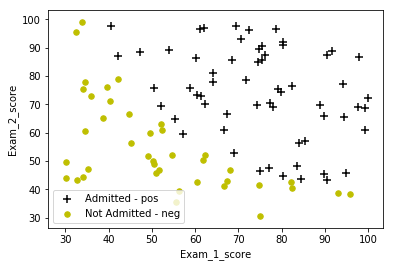

In [7]:
def split_to_two_array(data, label_x1, label_x2, label_pos, label_neg, axes=None):
    if axes == None:
        axes = plt.gca()

    pos = np.array([ data[i] for i in range(len(data)) if data[i,-1:] == 1 ])
    neg = np.array([ data[i] for i in range(len(data)) if data[i,-1:] == 0 ])
    
    axes.scatter(pos[:,0], pos[:,1], s=50, c='k', label=label_pos, marker='+', linewidths=2)
    axes.scatter(neg[:,0], neg[:,1], s=30, c='y', label=label_neg)
    axes.set_xlabel(label_x1)
    axes.set_ylabel(label_x2)    
    axes.legend()

split_to_two_array(ori_data_01, 'Exam_1_score', 'Exam_2_score', 'Admitted - pos', 'Not Admitted - neg')

###### method - 02 : output two bool arrays

    Boolean selector

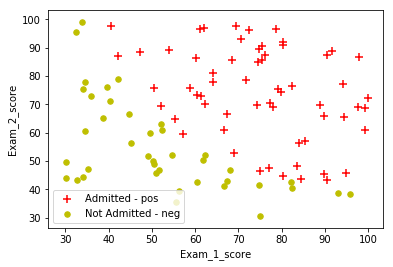

In [8]:
def output_two_bool_arrays(data, label_x1, label_x2, label_pos, label_neg, axes=None):
    if axes == None:
        axes = plt.gca()
    
    pos = (data[:, -1] == 1)
    neg = (data[:, -1] == 0)
    
    axes.scatter(data[pos][:,0], data[pos][:,1], s=50, c='r', label=label_pos, marker='+', linewidths=2)
    axes.scatter(data[neg][:,0], data[neg][:,1], s=30, c='y', label=label_neg)
    axes.set_xlabel(label_x1)
    axes.set_ylabel(label_x2)    
    axes.legend()

output_two_bool_arrays(ori_data_01, 'Exam_1_score', 'Exam_2_score', 'Admitted - pos', 'Not Admitted - neg')

###### method - 03 : output two index arrays

    np.where()

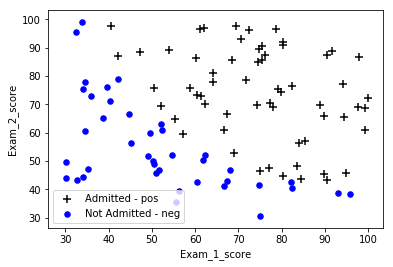

In [9]:
def output_two_index_arrays(data, label_x1, label_x2, label_pos, label_neg, axes=None):
    if axes == None:
        axes = plt.gca()
    
    pos = np.where(data[:,-1] == 1)
    neg = np.where(data[:,-1] == 0)
    
    axes.scatter(data[pos,0], data[pos,1], s=50, c='k', label=label_pos, marker='+', linewidths=2)
    axes.scatter(data[neg,0], data[neg,1], s=30, c='b', label=label_neg)
    axes.set_xlabel(label_x1)
    axes.set_ylabel(label_x2)    
    axes.legend()

output_two_index_arrays(ori_data_01, 'Exam_1_score', 'Exam_2_score', 'Admitted - pos', 'Not Admitted - neg')

In [10]:
def plot_ori_data(data, label_x1, label_x2, label_pos, label_neg, axes=None, method=0):
    if axes == None:
        axes = plt.gca()
    
    if method == 0:
        split_to_two_array(data, label_x1, label_x2, label_pos, label_neg, axes)
    elif method == 1:
        output_two_bool_arrays(data, label_x1, label_x2, label_pos, label_neg, axes)
    elif method == 2:
        output_two_index_arrays(data, label_x1, label_x2, label_pos, label_neg, axes)

###### subplot

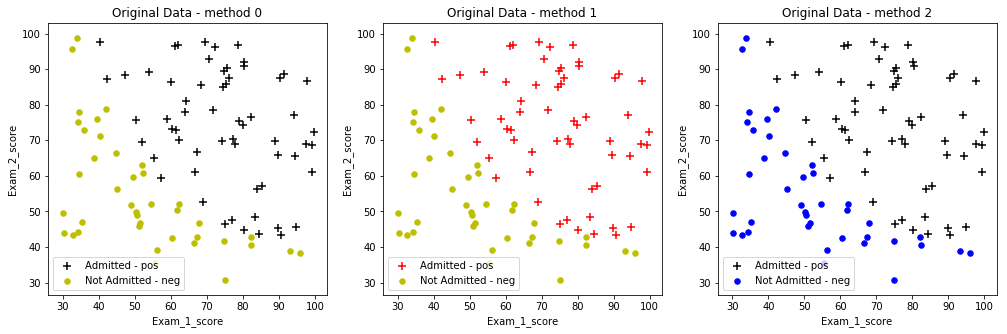

In [11]:
fig, axes = plt.subplots(1, 3, figsize=((17,5)))

for i in range(3):
    axes_i = axes.flatten()[i]
    plot_ori_data(ori_data_01, 'Exam_1_score', 'Exam_2_score', 'Admitted - pos', 'Not Admitted - neg', axes=axes_i, method=i)
    axes_i.set_title('Original Data - method %d'  %i)

## Logistic Regression

### Sigmod

+ $ g(z)=\frac{1}{1+e^{−z}} $
> + Z - (m, 1)
> + (m,)

###### method 01 : np.exp( )

In [12]:
def sigmoid_np_exp(Z):
    return (1.0 / (1 + np.exp(-Z)))    

###### method 02 : scipy.special.expit()

Scipy actually has a convenience function which does exactly the same:<BR>
http://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html#scipy.special.expit

In [13]:
def sigmoid_scipy_expit(Z):
    return scipy.special.expit(Z)

In [14]:
def sigmoid(Z, method=1):
    if method == 0:
        g = sigmoid_np_exp(Z)
    elif method == 1:
        g = sigmoid_scipy_expit(Z)
    
    return g

In [15]:
def plot_sigmoid():
    X = np.linspace(-10, 10, 50).reshape((-1,1))
    y = sigmoid(X)
    
    plt.plot(X, y)
    plt.grid(True)

def plot_log():
    X = np.linspace(0.1, 10, 50).reshape((-1,1))
    y = np.log(X)
    
    plt.plot(X, y)
    plt.grid(True)

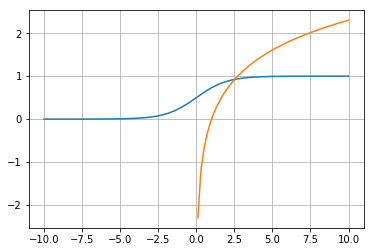

In [16]:
plot_sigmoid()
plot_log()

###### Hypthesis
+ $ h_{\theta}(x) = g(\theta^{T}x)$
> + theta - (n+1, 1)
> + X - (m, n+1)
> + (m,)

In [17]:
def hypthesis(theta, X):
    hyp = sigmoid(X @ theta)
    
    return hyp

### Cost Function

+ Normal : $ J\left( \theta  \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} $
+ Vector : $ J(\theta) = -\frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) $
> + theta - (n+1, )
> + X - (m, n+1)
> + y - (m, )
> + scalars

###### Process Zero

In [18]:
J_history = []

In [19]:
def replace_zeros(data):
    if np.count_nonzero(data):
        min_nonzero = np.min(data[np.nonzero(data)])
    else:
        min_nonzero = 0.000000000001
    data[data == 0] = min_nonzero
    
    return data

def cost_function_process_zero(theta, X, y):
    hyp = hypthesis(theta, X)
    y_1 = np.log(replace_zeros(hyp)).T @ y
    y_0 = np.log(replace_zeros(1-hyp)).T @ (1-y)
    cost = -(y_1 + y_0) / y.size
    
    return cost

In [20]:
def cost_function_simple(theta, X, y):
    hyp = hypthesis(theta, X)
    y_1 = np.log(hyp).T @ y
    y_0 = np.log((1-hyp)).T @ (1-y)
    cost = -(y_1 + y_0) / y.size
    
    return cost

In [21]:
def cost_function(theta, X, y, method=1):
    global J_history
    
    if method == 0:
        cost = cost_function_simple(theta, X, y)
    elif method == 1:
        cost = cost_function_process_zero(theta, X, y)
        
    J_history.append(cost)
    
    return cost

print("init cost :", cost_function(theta_init_zero, X_train, y_train))

init cost : 0.6931471805599453


###### Gradient Descent

+ Vector : $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$
> + theta - (n+1, )
> + X - (m, n+1)
> + y - (m, )
> + (n+1, )

In [22]:
def gradient(theta, X, y):
    hyp = hypthesis(theta, X)
    grad = X.T @ (hyp - y) / y.size
    
    return grad

### Optimize

#### Scipy

    opt.minimize

In [23]:
def scipy_opt_minimize(theta, X, y, Method):
    global J_history
    J_history = []
    res = opt.minimize(
        fun    = cost_function,
        x0     = theta,
        args   = (X, y),
        jac    = gradient,
        method = Method
    )
    
    return {
        "result"  : res,
        "theta"   : res.x,
        "success" : res.success,
        "cost_history" : J_history.copy()
    }

In [24]:
optimizer_dict = {
    'CG' : "CG",
    'BFGS' : "BFGS",
    'Newton-CG' : "Newton-CG",
    'L-BFGS-B' : "L-BFGS-B",
    'TNC' : "TNC",
}

result_scipy_minimize = []
for name in optimizer_dict:
    res = scipy_opt_minimize(theta_init_zero, X_train, y_train, name)
    res["name"] = name
    result_scipy_minimize.append(res)

    opt.fmin_X

###### scipy.optimize.fmin(func, x0, args=(), xtol=0.0001, ftol=0.0001, maxiter=None, maxfun=None, full_output=0, disp=1, retall=0, callback=None, initial_simplex=None)
###### scipy.optimize.fmin_bfgs(f, x0, fprime=None, args=(), gtol=1e-05, norm=inf, epsilon=1.4901161193847656e-08, maxiter=None, full_output=0, disp=1, retall=0, callback=None)
###### scipy.optimize.fmin_cg(f, x0, fprime=None, args=(), gtol=1e-05, norm=inf, epsilon=1.4901161193847656e-08, maxiter=None, full_output=0, disp=1, retall=0, callback=None)
###### scipy.optimize.fmin_tnc(func, x0, fprime=None, args=(), approx_grad=0, bounds=None, epsilon=1e-08, scale=None, offset=None, messages=15, maxCGit=-1, maxfun=None, eta=-1, stepmx=0, accuracy=0, fmin=0, ftol=-1, xtol=-1, pgtol=-1, rescale=-1, disp=None, callback=None)

In [25]:
def scipy_opt_fmin_X(theta, X, y):
    print(">> fmin")
    res_fmin = opt.fmin(
        func = cost_function,
        x0 = theta,
        args = (X, y), retall = True, disp = True
    )
    
    print(">> fmin_cg")
    res_fmin_cg = opt.fmin_cg(
        f = cost_function,
        x0 = theta,
        fprime = gradient,
        args = (X, y), retall = True, disp = True
    )
    
    print(">> fmin_bfgs")
    res_fmin_bfgs = opt.fmin_bfgs(
        f = cost_function,
        x0 = theta,
        fprime = gradient,
        args = (X, y), retall = True, disp = True
    )
    
    print(">> fmin_tnc")
    res_fmin_tnc = opt.fmin_tnc(
        func = cost_function,
        x0 = theta,
        fprime = gradient,
        args = (X, y), disp = True
    )
    
    return {
        'fmin' : res_fmin,
        'fmin_cg' : res_fmin_cg,
        'fmin_bfgs' : res_fmin_bfgs,
        'fmin_tnc' : res_fmin_tnc
    }

In [26]:
result_scipy_fmin = scipy_opt_fmin_X(theta_init_zero, X_train, y_train)

>> fmin
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
>> fmin_cg
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 92
         Function evaluations: 194
         Gradient evaluations: 194
>> fmin_bfgs
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 20
         Function evaluations: 27
         Gradient evaluations: 27
>> fmin_tnc


#### Sklearn

###### http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit

In [27]:
from sklearn.linear_model import LogisticRegression

    fit / predict / score

In [28]:
model = LogisticRegression(penalty='l2', C=1, fit_intercept=False, multi_class='ovr')

In [29]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
print('> model..intercept_ :', model.intercept_)
print('model.coef_ :', model.coef_)

> model..intercept_ : 0.0
model.coef_ : [[-3.89977794  0.03844482  0.03101855]]


In [31]:
model.predict([[1,80,90]])

array([1.])

In [32]:
model.score(X_train, y_train)

0.87

    cross validation

###### http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

In [33]:
from sklearn.model_selection import *

In [34]:
sk_X_train, sk_X_test, sk_y_train, sk_y_test = train_test_split(
    X_train, y_train, test_size=0.3, random_state=0
)
print("sk_X_train.shape :", sk_X_train.shape)
print("sk_X_test.shape :", sk_X_test.shape)

sk_X_train.shape : (70, 3)
sk_X_test.shape : (30, 3)


In [35]:
model_cv = LogisticRegression(penalty='l2', C=1, fit_intercept=False, multi_class='ovr')
clf = model_cv.fit(sk_X_train, sk_y_train)

In [36]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("cross_val_score :", scores)
print("Accuracy : %0.2f (+/- %0.2f)" %(scores.mean(), scores.std() * 2)  )

cross_val_score : [0.9 0.7 0.8 0.8 0.8 0.8 0.9 1.  0.9 0.7]
Accuracy : 0.83 (+/- 0.18)


    learning curve

In [37]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [38]:
from sklearn.utils import shuffle
X_shuf, Y_shuf = shuffle(X_train, y_train)
Y_shuf = Y_shuf.astype(np.int)

In [39]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_shuf, Y_shuf, 
                                                        cv=cv, train_sizes=np.linspace(.1, 1.0, 15))

In [40]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

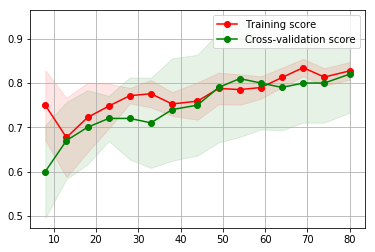

In [41]:
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

    validation_curve()

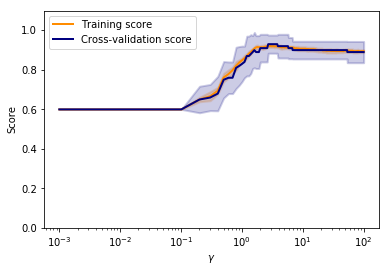

In [42]:
param_range = np.linspace(.001, 100, 1000)
train_scores, test_scores = validation_curve(
    clf, X_train, y_train, param_name="C", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

#### Batch Gradient Descent

In [43]:
def batch_gradient_descent(theta, X, y, lr=0.00007, iterations=1500):
    global J_history
    J_history = []
    theta_history = []
    
    for _ in range(iterations):
        theta_history.append(list(theta))
        cost_function(theta, X, y)
        grad = gradient(theta, X, y)
        theta = theta - lr * grad
    
    theta_history.append(list(theta))
    cost_function(theta, X, y)
    
    return {
        "lr" : lr,
        "iter" : iterations,
        "theta" : theta,
        "cost_history" : J_history.copy(),
        "theta_history" : theta_history.copy()
    }

In [44]:
result_batch_gd = batch_gradient_descent(theta_init_zero, X_train, y_train)#, iterations=1700000)
result_batch_gd["theta"]

array([-0.00725314,  0.0104745 ,  0.00050891])

### Predict && Accuary

In [45]:
def predict(theta, X, threshold=0.5, method=0):
    hyp = hypthesis(theta, X)
    if method == 0:
        pred = (hyp > threshold).astype("int")
    elif method == 1:
        pred = [1 if hyp >= threshold else 0 for i in hyp]
    
    return pred

In [46]:
pred_data = np.array([[1, 45, 85]])
predict(result_batch_gd["theta"], pred_data)

array([1])

In [47]:
def accuracy(theta, X, y, threshold=0.5):
    pred = predict(theta, X, threshold)
    accu = np.mean(pred == y)
    
    return accu

accu = accuracy(result_batch_gd["theta"], X_train, y_train)
print('Train accuracy {}%'.format(100 * accu))

Train accuracy 60.0%


### Sklearn - report

In [48]:
from sklearn.metrics import classification_report

In [49]:
sk_theta = np.array(model.coef_).T

In [50]:
y_pred = predict(sk_theta, X_train)
result = classification_report(y_train, y_pred)
print(result)

             precision    recall  f1-score   support

        0.0       1.00      0.68      0.81        40
        1.0       0.82      1.00      0.90        60

avg / total       0.89      0.87      0.86       100



## Plot Convergence Curves

http://stats.stackexchange.com/questions/93569/why-is-logistic-regression-a-linear-classifier
> $X \times \theta = 0$  (this is the line)

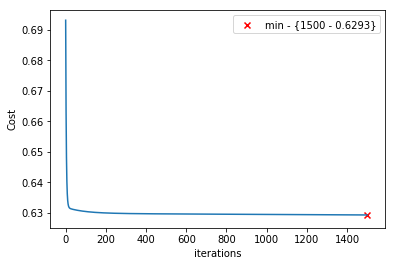

In [51]:
def plot_convergence_curves(J_history, axes=None):
    if axes == None:
        axes = plt.gca()
    
    axes.plot(np.arange(len(J_history)), J_history)
    axes.set_xlabel("iterations")
    axes.set_ylabel("Cost")
    
    ind = np.where(J_history == np.min(J_history))
    j_min = np.array(J_history)[ind]
    ind = np.arange(len(J_history))[ind]
    if len(ind) == 1:
        axes.scatter(ind, j_min, c='r', marker='x', label="min - {%d - %0.4f}" % (ind, j_min))
        axes.legend()

plot_convergence_curves(result_batch_gd["cost_history"])

In [52]:
print(result_scipy_minimize[0].keys())
print(len(result_scipy_minimize))

dict_keys(['result', 'theta', 'success', 'cost_history', 'name'])
5


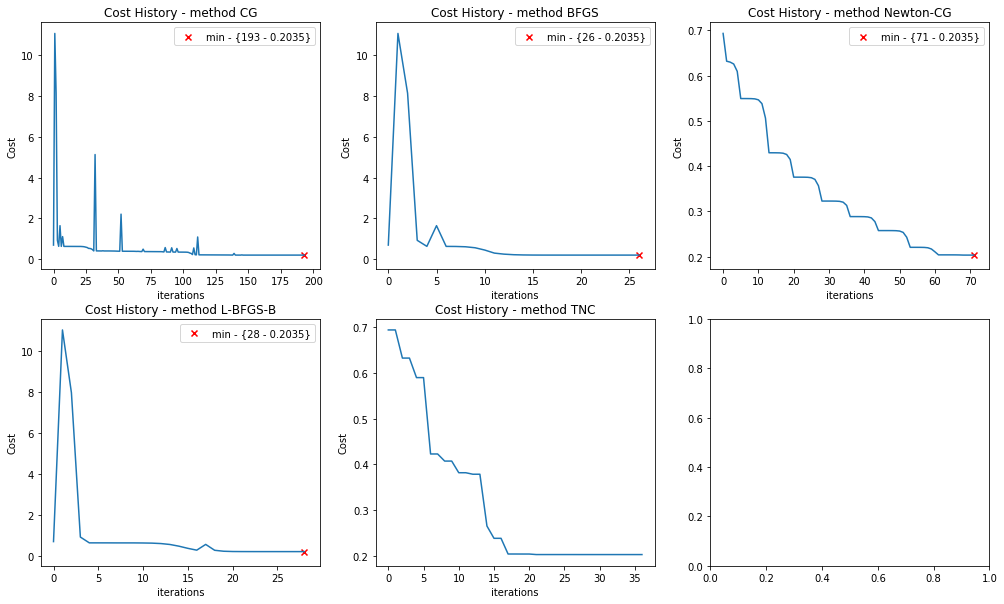

In [53]:
fig, axes = plt.subplots(2, 3, figsize=((17, 10)))

for i in range(5):
    axes_i = axes.flatten()[i]
    plot_convergence_curves(result_scipy_minimize[i]['cost_history'], axes=axes_i)
    axes_i.set_title('Cost History - method %s'  % result_scipy_minimize[i]['name'])

## Plot Decision Boundary

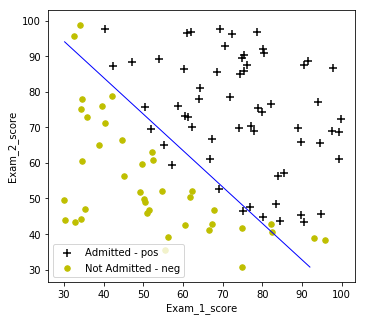

In [54]:
def plot_decision_boundary(data, theta, axes=None):
    X1_min, X1_max = data[:,0].min(), data[:,0].max()
    X2_min, X2_max = data[:,1].min(), data[:,1].max()

    xx1, xx2 = np.meshgrid(np.linspace(X1_min, X1_max), np.linspace(X2_min, X2_max))
    Countour_X = np.c_[np.ones((xx1.ravel().size,1)), xx1.ravel().reshape(-1,1), xx2.ravel().reshape(-1,1)]
    hyp = hypthesis(theta, Countour_X).reshape(xx1.shape)
    axes.contour(xx1, xx2, hyp, [0.5], linewidths=1, colors='b')
    

plt.figure(figsize=(5.5,5))
plot_ori_data(ori_data_01, 'Exam_1_score', 'Exam_2_score', 'Admitted - pos', 'Not Admitted - neg', axes=plt.gca())
plot_decision_boundary(ori_data_01, result_scipy_minimize[0]['theta'], axes=plt.gca())

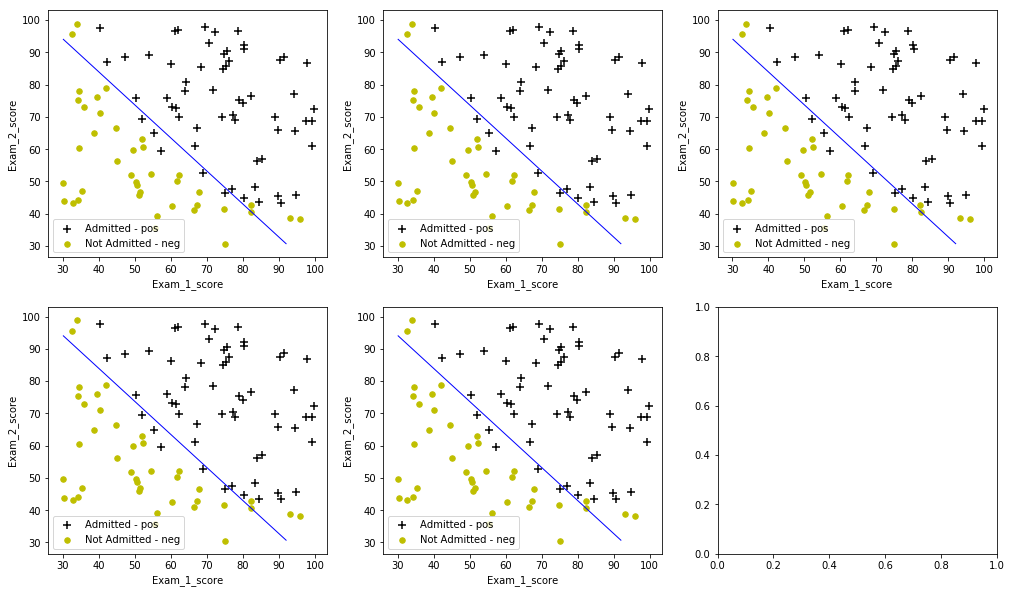

In [55]:
fig, axes = plt.subplots(2, 3, figsize=((17, 10)))

for i in range(5):
    axes_i = axes.flatten()[i]
    plot_ori_data(ori_data_01, 'Exam_1_score', 'Exam_2_score', 'Admitted - pos', 'Not Admitted - neg', axes=axes_i)
    plot_decision_boundary(ori_data_01, result_scipy_minimize[i]['theta'], axes=axes_i)

In [56]:
def plot_predict_data(pred_data, pred, axes=None):
    if axes == None:
        axes = plt.gca()
    
    axes.scatter(pred_data[:,1], pred_data[:,2], s=60, c='r', marker='v', label='(45, 85) : Pred as %d'%(pred))
    axes.legend()


pred_data = np.array([[1, 50, 70]])

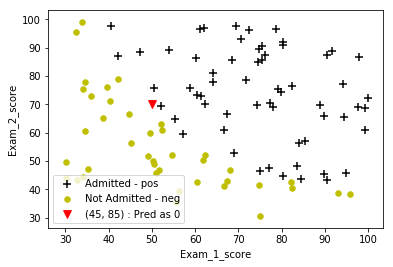

In [57]:
pred = predict(result_scipy_minimize[0]['theta'], pred_data)
plot_ori_data(ori_data_01, 'Exam_1_score', 'Exam_2_score', 'Admitted - pos', 'Not Admitted - neg')
plot_predict_data(pred_data, pred)

# Regularized Logistic Regression

###### load & proccess dataset

In [58]:
path = "dataset/ex2data2.txt"
ori_data_02 = np.loadtxt(path, delimiter=',')

print(">> ori_data_02.shape :", ori_data_02.shape)
print("\n>> ori_data_02[:3]\n", ori_data_02[:3])

>> ori_data_02.shape : (118, 3)

>> ori_data_02[:3]
 [[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]]


In [59]:
X_ori_02, y_ori_02, m = get_ori_X_y(ori_data_02)

>> X_ori.shape : (118, 2)
   y_ori.shape : (118,)
   Samples : 118


In [60]:
X_train_02, y_train_02 = form_train_data(X_ori_02, y_ori_02)

>> X_train.shape : (118, 3)

   X_train[:3,]
 [[ 1.        0.051267  0.69956 ]
 [ 1.       -0.092742  0.68494 ]
 [ 1.       -0.21371   0.69225 ]]

   y_train.shape : (118,)


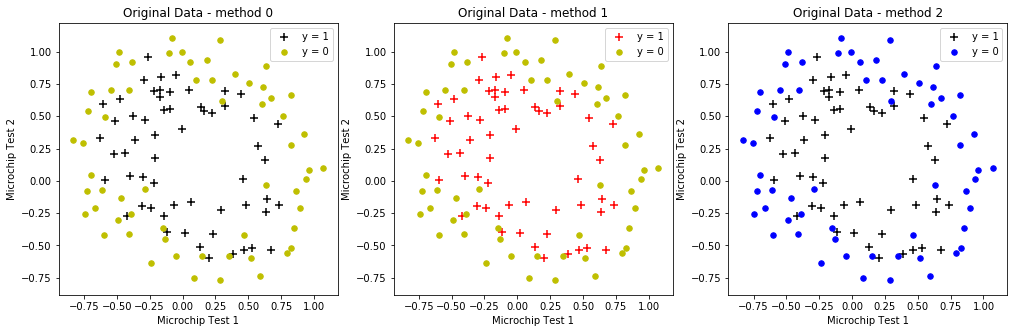

In [61]:
fig, axes = plt.subplots(1, 3, figsize=((17,5)))

for i in range(3):
    axes_i = axes.flatten()[i]
    plot_ori_data(ori_data_02, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes=axes_i, method=i)
    axes_i.set_title('Original Data - method %d'  %i)

## Feature Mapping

<img style="float: left;" src="dataset/mapped_feature.png">

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
poly = PolynomialFeatures(6)

In [64]:
ori_data_02.shape

(118, 3)

In [65]:
X_train_poly = poly.fit_transform(X_ori_02)
theta_init_zero_poly = np.zeros((X_train_poly.shape[1],))
print('X_train_poly.shape', X_train_poly.shape)

X_train_poly.shape (118, 28)


In [66]:
import pandas as pd
XX_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names())
XX_df.head()

,1,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3,...,x0^2 x1^3,x0 x1^4,x1^5,x0^6,x0^5 x1,x0^4 x1^2,x0^3 x1^3,x0^2 x1^4,x0 x1^5,x1^6
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


## Regularized Logistic Regression

###### Regularized Cost Function

+ Normal : $ J\left( \theta  \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} + \frac{\lambda }{2m}\sum\limits_{j=1}^{n}{{\theta }_{j}^{2}} $
+ Vector : $ J(\theta) = -\frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) + \frac{\lambda }{2m}\sum\limits_{j=1}^{n}{{\theta }_{j}^{2}} $
> + theta - (n+1, )
> + X - (m, n+1)
> + y - (m, )
> + scalars

In [67]:
J_history_reg = []
def cost_function_reg(theta, X, y, lamd=0):
    cost = cost_function(theta, X, y)
    reg_item = lamd * np.sum(np.power(theta[1:], 2)) / (2 * m)
    cost_reg = cost + reg_item
    J_history_reg.append(cost_reg)
    
    return cost_reg

print("init cost - lamd-1 :", cost_function_reg(theta_init_zero_poly, X_train_poly, y_train_02, 1))

init cost - lamd-1 : 0.6931471805599454


###### Regularized Gradient Descent

+ Vector : $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y) + \frac{\lambda}{m}\theta_{j}$$ 
##### $$\text{Note: intercept parameter } \theta_{0} \text{ is not to be regularized}$$
> + theta - (n+1, )
> + X - (m, n+1)
> + y - (m, )
> + (n+1, )

In [68]:
def gradient_reg(theta, X, y, lamd=0):
    grad = gradient(theta, X, y)
    reg_theta = lamd * theta[1:] / m
    reg_item = np.r_[[0], reg_theta]
    grad_reg = grad + reg_item
    
    return grad_reg

### Regularized Optimize

#### Scipy

In [69]:
def scipy_opt_minimize_reg(theta, X, y, Method, lamd=0):
    global J_history_reg
    J_history_reg = []
    res = opt.minimize(
        fun    = cost_function_reg,
        x0     = theta,
        args   = (X, y, lamd),
        jac    = gradient_reg,
        method = Method
    )
    
    return {
        "result"  : res,
        "theta"   : res.x,
        "success" : res.success,
        "cost_history" : J_history_reg.copy(),
        "name" : Method,
        "lamd" : lamd
    }

In [70]:
optimizer_dict = {
    'CG' : "CG",
    'BFGS' : "BFGS",
    'Newton-CG' : "Newton-CG",
    'L-BFGS-B' : "L-BFGS-B",
    'TNC' : "TNC",
    'L-BFGS-B' : 'L-BFGS-B'
}

lamd = 0.17
result_scipy_minimize_reg = []
for name in optimizer_dict:
    res = scipy_opt_minimize_reg(theta_init_zero_poly, X_train_poly, y_train_02, name, lamd)
    result_scipy_minimize_reg.append(res)

print("init cost : ", cost_function_reg(theta_init_zero_poly, X_train_poly, y_train_02, lamd=1))
print("")
for i in np.arange(len(result_scipy_minimize_reg)):
    print(result_scipy_minimize_reg[i]["name"], ":", result_scipy_minimize_reg[i]["success"])

init cost :  0.6931471805599454

CG : True
BFGS : True
Newton-CG : True
L-BFGS-B : True
TNC : True


In [71]:
def scipy_opt_fmin_X_reg(theta, X, y, lamd=0):
    print(">> fmin")
    res_fmin = opt.fmin(
        func = cost_function_reg,
        x0 = theta,
        args = (X, y, lamd), retall = True, disp = True
    )
    
    print(">> fmin_cg")
    res_fmin_cg = opt.fmin_cg(
        f = cost_function_reg,
        x0 = theta,
        fprime = gradient_reg,
        args = (X, y, lamd), retall = True, disp = True
    )
    
    print(">> fmin_bfgs")
    res_fmin_bfgs = opt.fmin_bfgs(
        f = cost_function_reg,
        x0 = theta,
        fprime = gradient_reg,
        args = (X, y, lamd), retall = True, disp = True
    )
    
    print(">> fmin_tnc")
    res_fmin_tnc = opt.fmin_tnc(
        func = cost_function_reg,
        x0 = theta,
        fprime = gradient_reg,
        args = (X, y, lamd), disp = True
    )
    
    return {
        'fmin' : res_fmin,
        'fmin_cg' : res_fmin_cg,
        'fmin_bfgs' : res_fmin_bfgs,
        'fmin_tnc' : res_fmin_tnc
    }

In [72]:
result_scipy_fmin_reg = scipy_opt_fmin_X_reg(theta_init_zero_poly, X_train_poly, y_train_02, 0.17)

>> fmin
>> fmin_cg
Optimization terminated successfully.
         Current function value: 0.419355
         Iterations: 47
         Function evaluations: 145
         Gradient evaluations: 145
>> fmin_bfgs
Optimization terminated successfully.
         Current function value: 0.419355
         Iterations: 76
         Function evaluations: 77
         Gradient evaluations: 77
>> fmin_tnc


#### Sklearn

In [73]:
model_reg = LogisticRegression(penalty='l2', C=1 / 0.17, fit_intercept=False, multi_class='ovr')
model_reg.fit(X_train_poly, y_train_02)
print('> model_reg..intercept_ :', model_reg.intercept_)
print('  model_reg.coef_ :', model_reg.coef_)

> model_reg..intercept_ : 0.0
  model_reg.coef_ : [[ 2.30641601  1.51250591  2.48389058 -3.58612477 -2.66192655 -3.26922794
   0.57980943 -0.94280933 -0.58746294 -0.31523425 -2.84677429  0.25583304
  -1.46987152 -0.90773564 -2.38086249 -0.48045973 -0.43111015  0.28672858
  -0.84620303 -0.90795846 -0.32876891 -2.20533881  0.29529227 -0.65129543
   0.24338695 -0.88522148 -0.64271874 -1.29474303]]


In [74]:
model_reg.score(X_train_poly, y_train_02)

0.8389830508474576

In [75]:
model_reg.coef_.shape

(1, 28)

In [76]:
print("opt cost | lamd-1 :", cost_function_reg(model_reg.coef_.T, X_train_poly, y_train_02, 0.17))

opt cost | lamd-1 : [0.4195306]


    cross validation

In [77]:
sk_X_train, sk_X_test, sk_y_train, sk_y_test = train_test_split(
    X_train_poly, y_train_02, test_size=0.3, random_state=0
)

In [78]:
model_cv = LogisticRegression(penalty='l2', C=1/0.17, fit_intercept=False, multi_class='ovr')
clf = model_cv.fit(sk_X_train, sk_y_train)

In [79]:
scores = cross_val_score(clf, X_train_poly, y_train_02, cv=10)
print("Accuracy : %0.2f (+/- %0.2f)" %(scores.mean(), scores.std() * 2)  )

Accuracy : 0.75 (+/- 0.34)


    train / cv - choose lamd

In [80]:
sk_X_train, sk_X_test, sk_y_train, sk_y_test = train_test_split(
    X_train_poly, y_train_02, test_size=0.3, random_state=0
)

In [81]:
lamdas = np.linspace(0.0001, 1, 500)

Jtrain = np.empty(len(lamdas))
Jcv = np.empty(len(lamdas))

for i, lamda in enumerate(lamdas):
    theta_init = np.zeros((sk_X_train.shape[1],))
    res = scipy_opt_minimize_reg(theta_init, sk_X_train, sk_y_train, "tnc", lamda)
    
    Jtrain[i] = cost_function_reg(res['theta'], sk_X_train, sk_y_train, lamda)
    Jcv[i] = cost_function_reg(res['theta'], sk_X_test, sk_y_test, lamda)

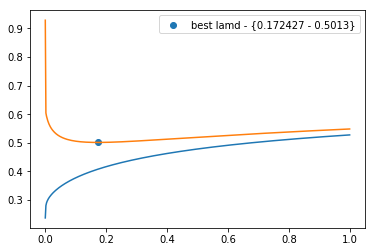

In [82]:
plt.plot(lamdas, Jtrain, lamdas, Jcv)
ind = np.where(Jcv == np.amin(Jcv))
optLambda = lamdas[ind]
plt.scatter(optLambda, Jcv[ind], label="best lamd - {%f - %0.4f}" % (optLambda, Jcv[ind]))
plt.legend()

In [83]:
theta_init = np.zeros((sk_X_train.shape[1],))
res = scipy_opt_minimize_reg(theta_init, sk_X_train, sk_y_train, "tnc", optLambda)
accuracy(res['theta'], sk_X_test, sk_y_test, threshold=0.5)

0.8333333333333334

    learning_curve

In [84]:
cv = ShuffleSplit(n_splits=7, test_size=0.2, random_state=0)

In [85]:
y_shuf_02 = y_train_02.copy()
X_shuf_02, Y_shuf_02 = shuffle(X_train_poly, y_shuf_02)
Y_shuf_02 = Y_shuf_02.astype(np.int)

In [86]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_shuf_02, Y_shuf_02, cv=cv, 
                                                        train_sizes=np.linspace(.1, 1.0, 20))

In [87]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

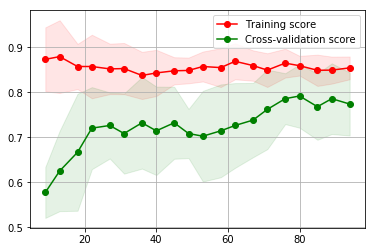

In [88]:
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")

    validation_curve

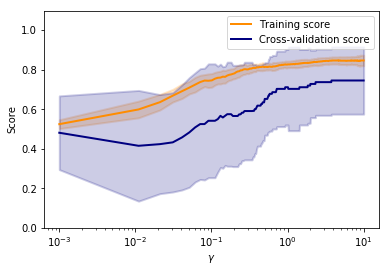

In [89]:
param_range = np.linspace(.001, 10, 1000)
train_scores, test_scores = validation_curve(
    clf, X_train_poly, y_train_02, param_name="C", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

#### Batch Gradient Descent

In [90]:
def batch_gradient_descent_reg(theta, X, y, lr=0.009, iterations=1500, lamd = 0.17):
    global J_history_reg
    J_history_reg = []
    theta_history_reg = []
    
    for _ in range(iterations):
        theta_history_reg.append(list(theta))
        cost_function_reg(theta, X, y, lamd)
        grad = gradient(theta, X, y, lamd)
        theta = theta - lr * grad
    
    theta_history_reg.append(list(theta))
    cost_function_reg(theta, X, y, lamd)
    
    return {
        "lr" : lr,
        "iter" : iterations,
        "theta" : theta,
        "cost_history" : J_history_reg.copy(),
        "theta_history" : theta_history_reg.copy(),
        "lamd" : lamd
    }

###### Do Predict & Accuracy

In [91]:
accu = accuracy(result_scipy_minimize_reg[3]["theta"], X_train_poly, y_train_02)
print('Train accuracy {}%'.format(100 * accu))

Train accuracy 83.89830508474576%


In [92]:
for i in np.arange(len(result_scipy_minimize_reg)):
    print(">> :", result_scipy_minimize_reg[i]["name"])
    print("     lamd -", result_scipy_minimize_reg[i]["lamd"], ":", result_scipy_minimize_reg[i]["success"])
    theta = result_scipy_minimize_reg[i]["theta"]
    accu = accuracy(theta, X_train_poly, y_train_02)
    print('     accuracy {}%\n'.format(100 * accu))

>> : CG
     lamd - 0.17 : True
     accuracy 83.89830508474576%

>> : BFGS
     lamd - 0.17 : True
     accuracy 83.89830508474576%

>> : Newton-CG
     lamd - 0.17 : True
     accuracy 83.89830508474576%

>> : L-BFGS-B
     lamd - 0.17 : True
     accuracy 83.89830508474576%

>> : TNC
     lamd - 0.17 : True
     accuracy 83.89830508474576%



###### plot convergence curves

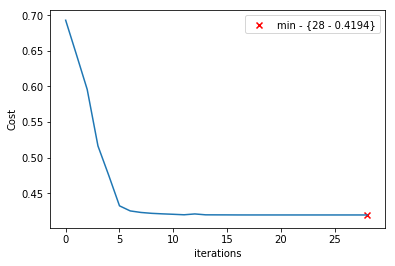

In [93]:
plot_convergence_curves(result_scipy_minimize_reg[3]["cost_history"])

>> : CG
     lamd - 0.17 : True
     accuracy 83.89830508474576%

>> : BFGS
     lamd - 0.17 : True
     accuracy 83.89830508474576%

>> : Newton-CG
     lamd - 0.17 : True
     accuracy 83.89830508474576%

>> : L-BFGS-B
     lamd - 0.17 : True
     accuracy 83.89830508474576%

>> : TNC
     lamd - 0.17 : True
     accuracy 83.89830508474576%



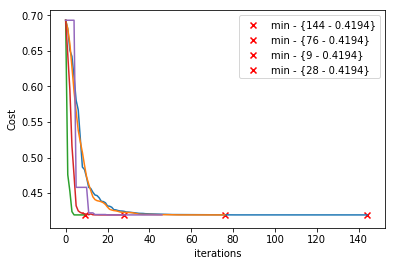

In [94]:
for i in np.arange(len(result_scipy_minimize_reg)):
    print(">> :", result_scipy_minimize_reg[i]["name"])
    print("     lamd -", result_scipy_minimize_reg[i]["lamd"], ":", result_scipy_minimize_reg[i]["success"])
    theta = result_scipy_minimize_reg[i]["theta"]
    accu = accuracy(theta, X_train_poly, y_train_02)
    print('     accuracy {}%\n'.format(100 * accu))
    plot_convergence_curves(result_scipy_minimize_reg[i]["cost_history"])

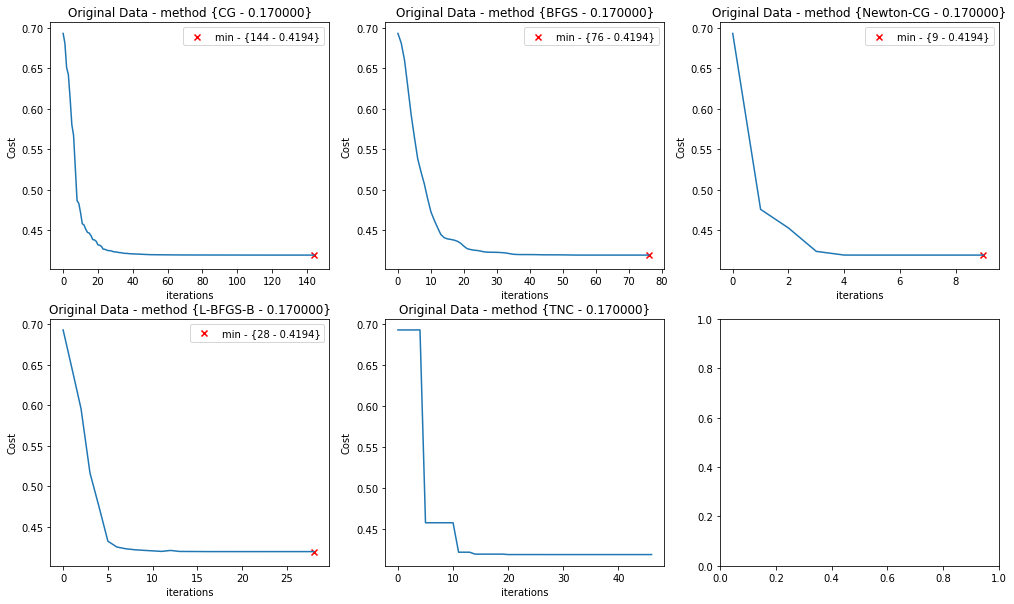

In [95]:
fig, axes = plt.subplots(2, 3, figsize=((17,10)))

for i in range(5):
    axes_i = axes.flatten()[i]
    plot_convergence_curves(result_scipy_minimize_reg[i]["cost_history"], axes=axes_i)
    
    name = result_scipy_minimize_reg[i]["name"]
    lamd = result_scipy_minimize_reg[i]["lamd"]
    axes_i.set_title('Original Data - method {%s - %f}' % (name, lamd))

###### plot decision boundary

In [96]:
def plot_decision_boundary(data, theta, axes=None, lamd=0, disp=False):
    X1_min, X1_max = data[:,0].min(), data[:,0].max()
    X2_min, X2_max = data[:,1].min(), data[:,1].max()

    xx1, xx2 = np.meshgrid(np.linspace(X1_min, X1_max), np.linspace(X2_min, X2_max))
    XX = poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()])
    hyp = hypthesis(theta, XX).reshape(xx1.shape)
    cont = axes.contour(xx1, xx2, hyp, [0.5], linewidths=1, colors='b')
    
    if disp:
        axes.clabel(cont, inline=True, colors='r', fontsize=15, fmt=('lambda = %.2f' %lamd))

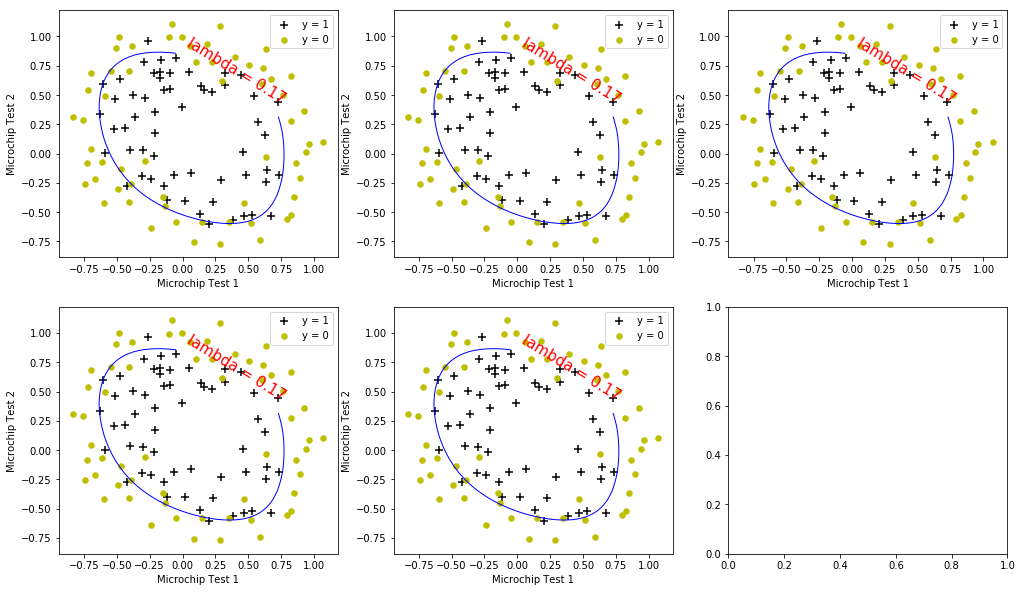

In [97]:
fig, axes = plt.subplots(2, 3, figsize=((17, 10)))

for i in range(5):
    axes_i = axes.flatten()[i]
    plot_ori_data(ori_data_02, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes_i)
    plot_decision_boundary(ori_data_02, result_scipy_minimize_reg[i]["theta"], axes_i, result_scipy_minimize_reg[i]["lamd"], disp=True)

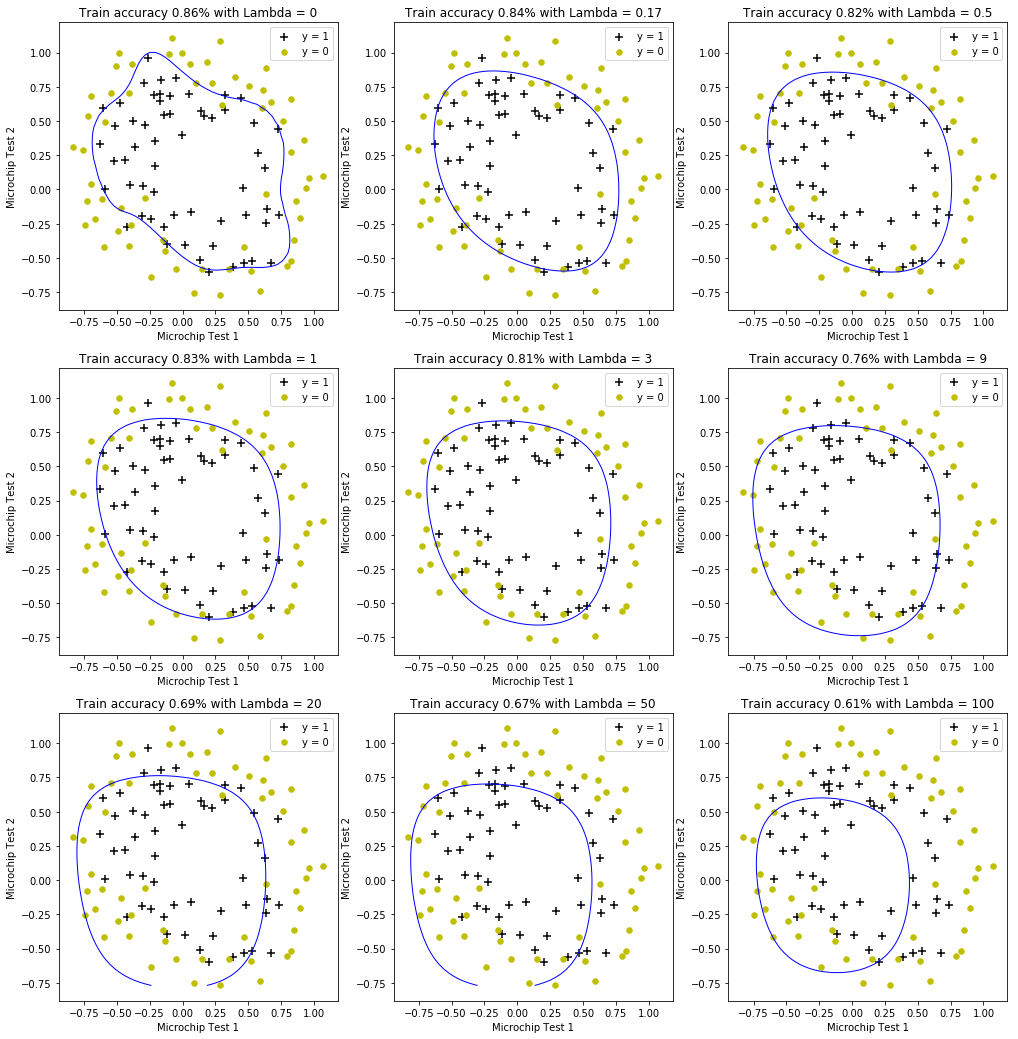

In [98]:
fig, axes = plt.subplots(3, 3, figsize=(17,18))

for i, C in enumerate([0, 0.17, 0.5, 1, 3, 9, 20, 50, 100]):
    res = scipy_opt_minimize_reg(theta_init_zero_poly, X_train_poly, y_train_02, "tnc", lamd = C)
    theta = res["theta"]
    accu = accuracy(theta, X_train_poly, y_train_02)
    
    axes_i = axes.flatten()[i]
    plot_ori_data(ori_data_02, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes_i)
    plot_decision_boundary(ori_data_02, res['theta'], axes_i, C)
    axes_i.set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accu, decimals=2), C))